In [2]:
import numpy as np
import pandas as pd

import warnings
import xarray as xr

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import cmocean as cmo
import seaborn as sns

In [3]:
### Adicionando Batimetria ###

'Carregando batimetria'
bvar=xr.open_dataset('/home/bruno/data/GEBCO_20-40S/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')
bvar.variables.keys()

'decimando a batimetria para resolução do satélite'

dec=10 #escolher aqui o fator
bat=bvar['elevation'][::dec,::dec]
blon=bvar['lon'][::dec]
blat=bvar['lat'][::dec]

In [35]:
### Building a  CDM dataset ###

#open serie cmems L3 daily composite

sst_file = xr.open_dataset('/home/bruno/data/sst/sst.wkmean.1990-present.nc')

#sst_file_1 = xr.open_mfdataset('/home/bruno/git/CMEMS/sst_data/SST*',concat_dim='time')
#sst = sst.assign({'analysed_sst':sst.analysed_sst-273})

print(sst_file_1.variables)

Frozen({'lon': <xarray.IndexVariable 'lon' (lon: 400)>
array([-59.975, -59.925, -59.875, ..., -40.125, -40.075, -40.025],
      dtype=float32)
Attributes:
    standard_name:        longitude
    long_name:            longitude
    units:                degrees_east
    valid_min:            -180.0
    valid_max:            180.0
    axis:                 X
    comment:               Longitude geographical coordinates,WGS84 projection
    _ChunkSizes:          7200
    _CoordinateAxisType:  Lon, 'lat': <xarray.IndexVariable 'lat' (lat: 401)>
array([-40.025, -39.975, -39.925, ..., -20.125, -20.075, -20.025],
      dtype=float32)
Attributes:
    standard_name:        latitude
    long_name:            latitude
    units:                degrees_north
    valid_min:            -90.0
    valid_max:            90.0
    axis:                 Y
    comment:               Latitude geographical coordinates,WGS84 projection
    _ChunkSizes:          3600
    _CoordinateAxisType:  Lat, 'analysis_er

In [36]:
#Building a data-set for interest region: Selecionando uma região de interesse

#sst_data = sst_file.sel(lon=[280.0, 320.0], lat=[-20.0, -40.0], method="nearest")

sst_data = sst_file.isel(lat = (sst_file.lat > -40) & (sst_file.lat < -20), ## Atenção pra esse comando isel, tem que conferir pra ver se ele 
                     lon = (sst_file.lon < 320) & (sst_file.lon > 300))

In [37]:
# select time-period: selecionando um periodo de tempo especifico.

sst_data = sst_data.sel(time = slice("2002", "2019"))

In [38]:
tempo = sst_data.coords['time']

sst = sst_data.sst

In [40]:
print(sst)

<xarray.DataArray 'sst' (time: 939, lat: 20, lon: 20)>
[375600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -20.5 -21.5 -22.5 -23.5 ... -36.5 -37.5 -38.5 -39.5
  * lon      (lon) float32 300.5 301.5 302.5 303.5 ... 316.5 317.5 318.5 319.5
  * time     (time) datetime64[ns] 2002-01-06 2002-01-13 ... 2019-12-29
Attributes:
    long_name:             Weekly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.8  36.16]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Weekly Mean
    parent_stat:           Individual obs
    standard_name:         sea_surface_temperature
    valid_range:           [-500 4000]


In [41]:
#### Fazendo a media no eixo do tempo

sst_ymean = sst.mean('time')

lon = sst.lon
lat = sst.lat


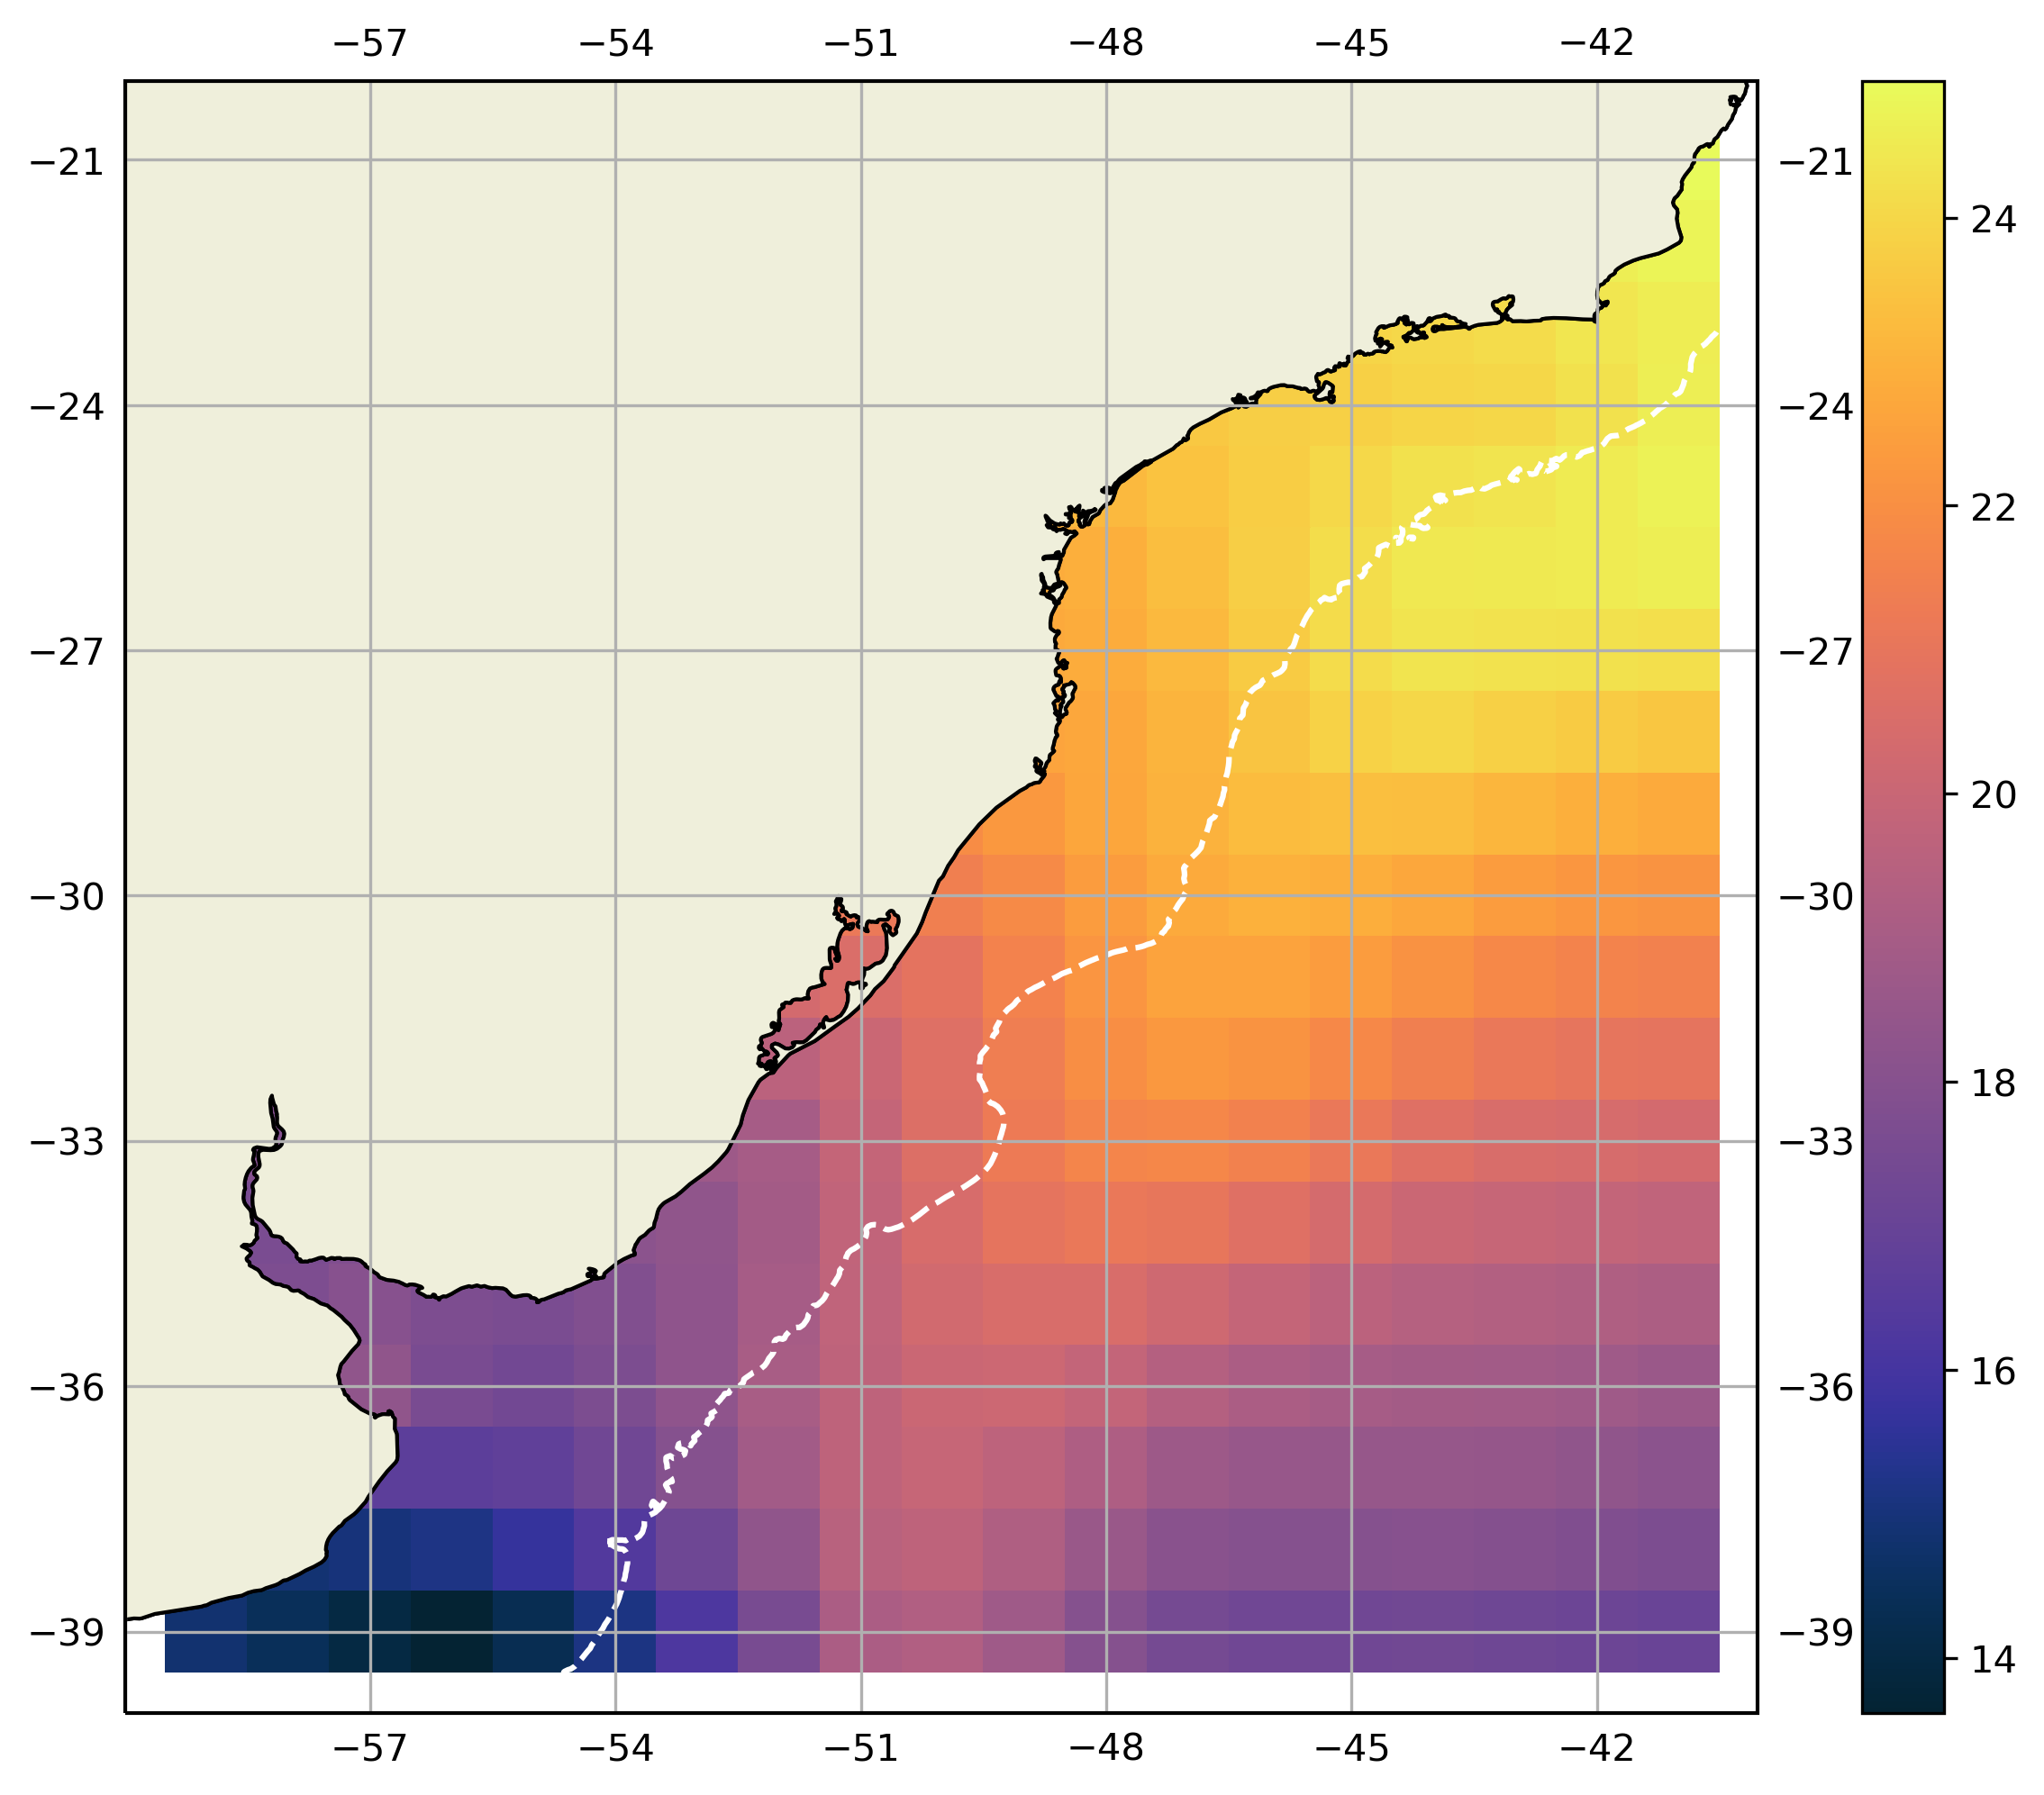

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

fig1= plt.figure(figsize=(10, 8), dpi=300)

## contornos e colobar


ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon, lat, sst_ymean,cmap=cmo.cm.thermal)


ax.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax.add_feature(land_poly)
ax.gridlines(draw_labels=True);

plt.contour(blon,blat,bat,levels=[-2000], colors=['white'])

cbar = plt.colorbar(f1, orientation="vertical", fraction=0.1)

In [31]:
# def year_month(xray_obj):
#     """Given an xray object with a 'time' coordinate, return an DataArray
#     with values given by the first date of the month in which each time
#     falls.
#     """
#     time = xray_obj.coords['time']
#     values = time.to_index().to_period('M').to_timestamp()
#     return xr.DataArray(values, [time], name='year_month')

# monthly_avg = sst_file.groupby(year_month(sst_file)).mean()
# monthly_avg.to_dataframe().plot(style='s-')